In [4]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_excel("/home/mahaputra777/pt_skp/dataset/Reservation.xls")

In [6]:
df.head()

,Reservation Date,Folio,Reference No,Room Type,Room,Rates,Guest,Date of Birth,Guest Email,Nationality,...,Status,Cancel Date,Special Request,Room Charge,Extra Charge,Pos,Rebate,Commission,Total,Room Net
0,2025-07-09,4,NaN,River House,River House,Room Breakfast 4 Pax,Anthony,NaN,NaN,NaN,...,CHECK_OUT,NaN,NaN,8730000,0,0.0,0,218250.0,8730000.0,6.992888e+06
1,2025-07-09,7,NaN,River Suite,River Suite C3,Room Breakfast 2 Pax,Clair Fraser,NaN,NaN,NaN,...,CHECK_OUT,NaN,NaN,7692300,0,0.0,0,1384614.0,7692300.0,4.811399e+06
2,2025-07-09,6,NaN,River Suite,River Suite C4,Room Breakfast 2 Pax,Clair Fraser,NaN,NaN,NaN,...,CHECK_OUT,NaN,NaN,7692300,0,0.0,0,1384614.0,7692300.0,4.811399e+06
3,2025-07-09,5,NaN,River Suite,River Suite A8,Room Breakfast 2 Pax,Diana Ivanovski,NaN,NaN,NaN,...,CHECK_OUT,NaN,NaN,9000000,0,0.0,0,225000.0,9000000.0,6.756757e+06
4,2025-07-09,12,NaN,River Suite,River Suite D7,Room Breakfast 2 Pax,Kristyn,NaN,NaN,NaN,...,CHECK_OUT,NaN,NaN,6593400,0,0.0,0,1186812.0,6593400.0,4.124057e+06


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 959 entries, 0 to 958
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Reservation Date  959 non-null    object 
 1   Folio             959 non-null    int64  
 2   Reference No      431 non-null    object 
 3   Room Type         959 non-null    object 
 4   Room              959 non-null    object 
 5   Rates             959 non-null    object 
 6   Guest             959 non-null    object 
 7   Date of Birth     0 non-null      float64
 8   Guest Email       512 non-null    object 
 9   Nationality       392 non-null    object 
 10  Country           810 non-null    object 
 11  Province          0 non-null      float64
 12  City              0 non-null      float64
 13  Arrival           959 non-null    object 
 14  Departure         959 non-null    object 
 15  Nights            959 non-null    int64  
 16  Agent             959 non-null    object 
 1

In [8]:
# Daftar kolom yang ingin diubah
date_columns = ['Reservation Date', 'Arrival', 'Departure', 'Cancel Date']

# Loop untuk mengubah tipe data
for col in date_columns:
    df[col] = pd.to_datetime(df[col], errors='coerce')

# Cek hasil
print(df[date_columns].dtypes)

Reservation Date    datetime64[ns]
Arrival             datetime64[ns]
Departure           datetime64[ns]
Cancel Date         datetime64[ns]
dtype: object


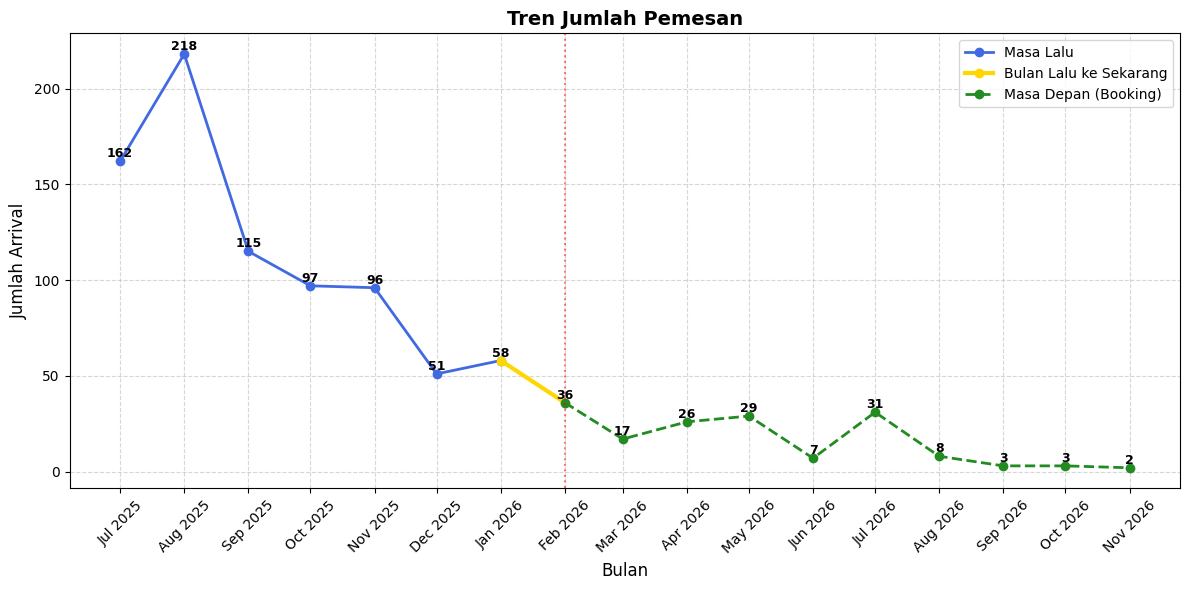

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from pandas.tseries.offsets import MonthBegin

# 1. Pastikan kolom Arrival menjadi tipe datetime
df['Arrival'] = pd.to_datetime(df['Arrival'])

# 2. Agregasi data per bulan
monthly_occupancy = df.groupby(df['Arrival'].dt.to_period('M')).size()
monthly_occupancy.index = monthly_occupancy.index.to_timestamp()

# 3. Tentukan batas waktu
# Bulan ini (tanggal 1)
this_month = pd.Timestamp(datetime.now()).replace(day=1, hour=0, minute=0, second=0, microsecond=0)
# Bulan lalu (tanggal 1)
last_month = this_month - MonthBegin(1)

# 4. Memisahkan segmen data untuk pewarnaan yang berbeda
# Segmen Biru: Sampai Bulan Lalu
past_blue = monthly_occupancy[monthly_occupancy.index <= last_month]

# Segmen Kuning: Dari Bulan Lalu ke Bulan Ini
transition_yellow = monthly_occupancy[(monthly_occupancy.index >= last_month) & 
                                      (monthly_occupancy.index <= this_month)]

# Segmen Hijau: Dari Bulan Ini ke Depan
future_green = monthly_occupancy[monthly_occupancy.index >= this_month]

# 5. Membuat Plot
plt.figure(figsize=(12, 6))

# Plot Masa Lalu (Biru)
plt.plot(past_blue.index, past_blue.values, marker='o', linestyle='-', color='royalblue', label='Masa Lalu', linewidth=2)

# Plot Transisi (Kuning) - Penghubung Bulan Lalu ke Bulan Ini
plt.plot(transition_yellow.index, transition_yellow.values, marker='o', linestyle='-', color='gold', label='Bulan Lalu ke Sekarang', linewidth=3)

# Plot Masa Depan (Hijau)
plt.plot(future_green.index, future_green.values, marker='o', linestyle='--', color='forestgreen', label='Masa Depan (Booking)', linewidth=2)

# Menambahkan Label Angka di setiap titik
for x, y in monthly_occupancy.items():
    plt.text(x, y + 0.5, str(y), ha='center', va='bottom', fontsize=9, fontweight='bold')

# Elemen Estetik
plt.title('Tren Jumlah Pemesan', fontsize=14, fontweight='bold')
plt.xlabel('Bulan', fontsize=12)
plt.ylabel('Jumlah Arrival', fontsize=12)
plt.axvline(x=this_month, color='red', linestyle=':', alpha=0.5) # Penanda bulan ini
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()

# Format tanggal di sumbu X agar rapi
plt.xticks(monthly_occupancy.index, monthly_occupancy.index.strftime('%b %Y'), rotation=45)

plt.tight_layout()
plt.show()

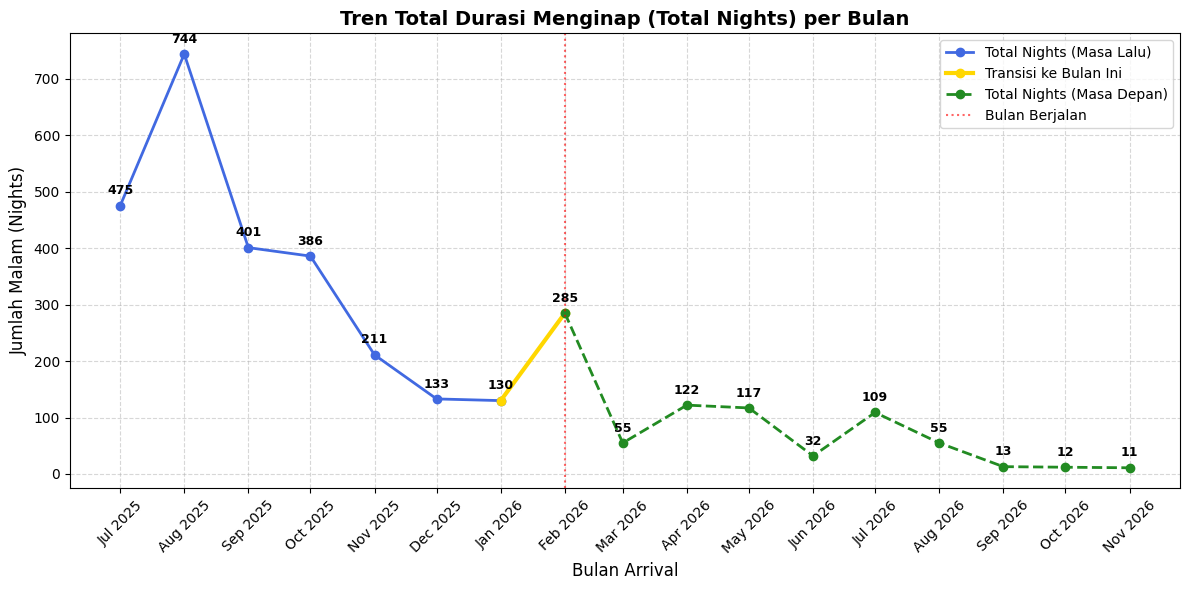

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from pandas.tseries.offsets import MonthBegin

# 1. Pastikan kolom Arrival menjadi tipe datetime
df['Arrival'] = pd.to_datetime(df['Arrival'])

# 2. Agregasi data: Menjumlahkan (SUM) kolom 'Nights' per bulan
monthly_nights = df.groupby(df['Arrival'].dt.to_period('M'))['Nights'].sum()
monthly_nights.index = monthly_nights.index.to_timestamp()

# 3. Tentukan batas waktu (Berdasarkan waktu sekarang)
# Misal hari ini Feb 2026, maka this_month adalah 2026-02-01
this_month = pd.Timestamp(datetime.now()).replace(day=1, hour=0, minute=0, second=0, microsecond=0)
last_month = this_month - MonthBegin(1)

# 4. Memisahkan segmen data untuk pewarnaan
# Segmen Biru: Histori sampai bulan lalu
past_blue = monthly_nights[monthly_nights.index <= last_month]

# Segmen Kuning: Transisi dari bulan lalu ke bulan ini
transition_yellow = monthly_nights[(monthly_nights.index >= last_month) & 
                                   (monthly_nights.index <= this_month)]

# Segmen Hijau: Proyeksi masa depan dari bulan ini ke depan
future_green = monthly_nights[monthly_nights.index >= this_month]

# 5. Membuat Plot
plt.figure(figsize=(12, 6))

# Plot Masa Lalu (Biru)
plt.plot(past_blue.index, past_blue.values, marker='o', linestyle='-', color='royalblue', 
         label='Total Nights (Masa Lalu)', linewidth=2)

# Plot Transisi (Kuning)
plt.plot(transition_yellow.index, transition_yellow.values, marker='o', linestyle='-', 
         color='gold', label='Transisi ke Bulan Ini', linewidth=3)

# Plot Masa Depan (Hijau)
plt.plot(future_green.index, future_green.values, marker='o', linestyle='--', 
         color='forestgreen', label='Total Nights (Masa Depan)', linewidth=2)

# Menambahkan Label Angka (Total Nights) di setiap titik
for x, y in monthly_nights.items():
    plt.text(x, y + (max(monthly_nights)*0.02), f'{int(y)}', 
             ha='center', va='bottom', fontsize=9, fontweight='bold')

# Elemen Estetik
plt.title('Tren Total Durasi Menginap (Total Nights) per Bulan', fontsize=14, fontweight='bold')
plt.xlabel('Bulan Arrival', fontsize=12)
plt.ylabel('Jumlah Malam (Nights)', fontsize=12)
plt.axvline(x=this_month, color='red', linestyle=':', alpha=0.6, label='Bulan Berjalan')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()

# Format tanggal di sumbu X
plt.xticks(monthly_nights.index, monthly_nights.index.strftime('%b %Y'), rotation=45)

plt.tight_layout()
plt.show()

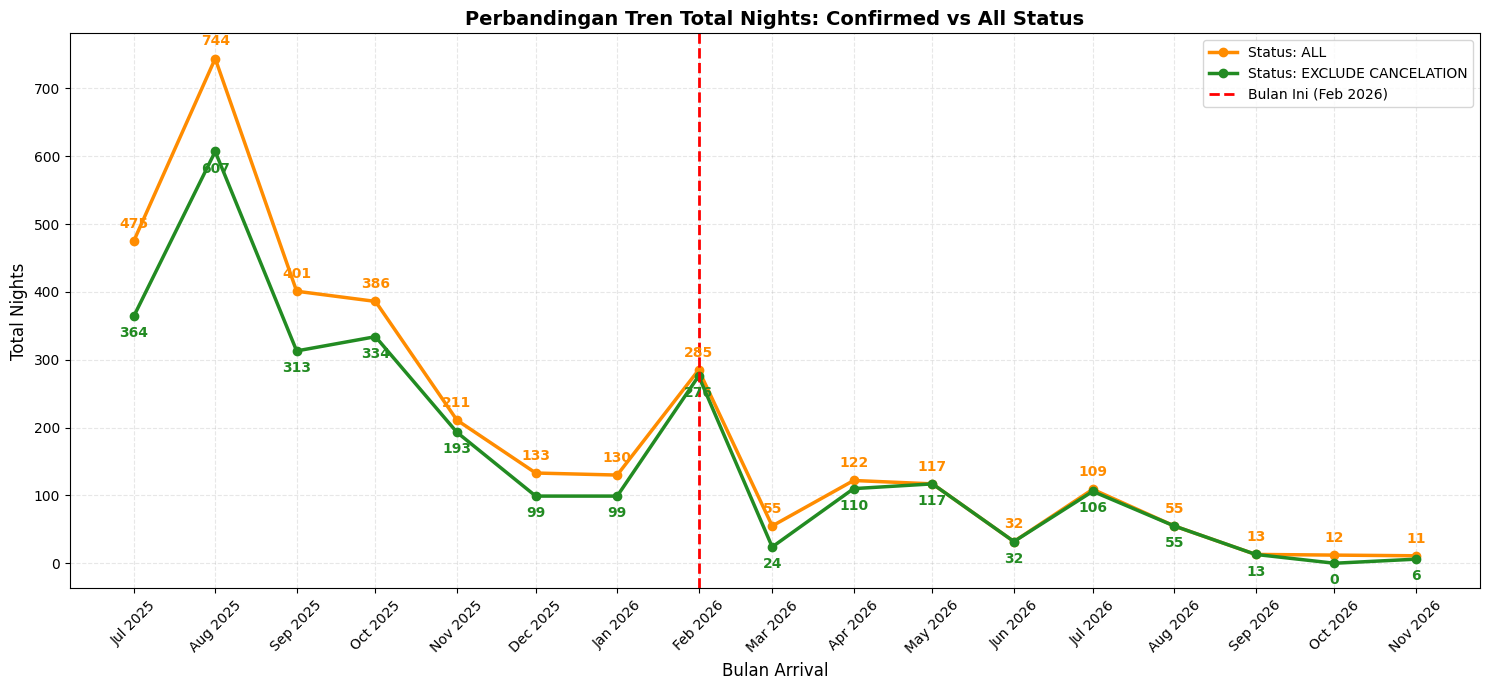

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# 1. Pastikan kolom Arrival menjadi tipe datetime
df['Arrival'] = pd.to_datetime(df['Arrival'])

# 2. Definisikan kondisi status
confirmed_status = ['DEFINITE', 'CHECK_OUT']

# 3. Pisahkan dataframe dan Agregasi Total Nights per bulan
all_months = sorted(df['Arrival'].dt.to_period('M').unique())

trend_confirmed = df[df['Status'].isin(confirmed_status)].groupby(
    df['Arrival'].dt.to_period('M'))['Nights'].sum().reindex(all_months, fill_value=0)

trend_all = df.groupby(
    df['Arrival'].dt.to_period('M'))['Nights'].sum().reindex(all_months, fill_value=0)

# Kembalikan ke format timestamp untuk plotting
trend_confirmed.index = trend_confirmed.index.to_timestamp()
trend_all.index = trend_all.index.to_timestamp()

# --- TAMBAHAN: Tentukan Bulan Ini ---
today = pd.Timestamp(datetime.now()).replace(day=1, hour=0, minute=0, second=0, microsecond=0)

# 4. Membuat Plot
plt.figure(figsize=(15, 7))

# Plot Garis Oranye (Status: ALL)
plt.plot(trend_all.index, trend_all.values, marker='o', 
         linestyle='-', color='darkorange', label='Status: ALL', linewidth=2.5)

# Plot Garis Hijau (Status: EXCLUDE CANCELATION)
plt.plot(trend_confirmed.index, trend_confirmed.values, marker='o', 
         linestyle='-', color='forestgreen', label='Status: EXCLUDE CANCELATION', linewidth=2.5)

# --- TAMBAHAN: Garis Penanda Bulan Ini ---
plt.axvline(x=today, color='red', linestyle='--', linewidth=2, label=f'Bulan Ini ({today.strftime("%b %Y")})')

# 5. LOGIKA ANTI-TUMPANG TINDIH UNTUK LABEL ANGKA
max_val = max(trend_all.max(), trend_confirmed.max())
offset = max_val * 0.02  # Jarak dinamis antar teks dan titik

for i in range(len(all_months)):
    val_all = trend_all.values[i]
    val_conf = trend_confirmed.values[i]
    x_pos = trend_all.index[i]
    
    # Jika Nilai ALL (Oren) lebih tinggi atau sama dengan Confirmed (Hijau)
    if val_all >= val_conf:
        # Oren di atas
        plt.text(x_pos, val_all + offset, f'{int(val_all)}', 
                 color='darkorange', ha='center', va='bottom', fontweight='bold')
        # Hijau di bawah
        plt.text(x_pos, val_conf - offset, f'{int(val_conf)}', 
                 color='forestgreen', ha='center', va='top', fontweight='bold')
    else:
        # Hijau di atas
        plt.text(x_pos, val_conf + offset, f'{int(val_conf)}', 
                 color='forestgreen', ha='center', va='bottom', fontweight='bold')
        # Oren di bawah
        plt.text(x_pos, val_all - offset, f'{int(val_all)}', 
                 color='darkorange', ha='center', va='top', fontweight='bold')

# Elemen Estetik
plt.title('Perbandingan Tren Total Nights: Confirmed vs All Status', fontsize=14, fontweight='bold')
plt.xlabel('Bulan Arrival', fontsize=12)
plt.ylabel('Total Nights', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3)
plt.legend(loc='upper right')

# Format tanggal di sumbu X
plt.xticks(trend_all.index, trend_all.index.strftime('%b %Y'), rotation=45)

plt.tight_layout()
plt.show()

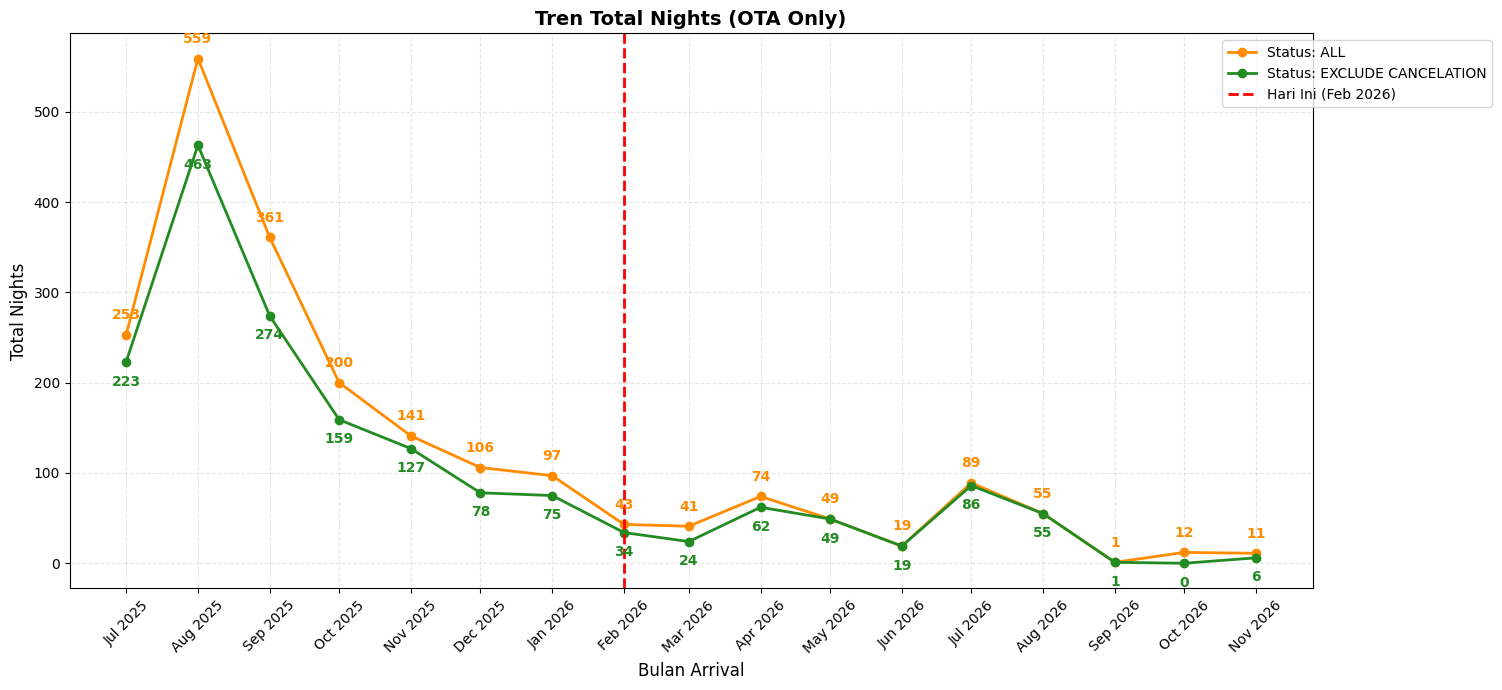

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# 1. Pastikan kolom Arrival menjadi tipe datetime
df['Arrival'] = pd.to_datetime(df['Arrival'])

# 2. Definisikan filter
exclude_agents = ['WALK IN', 'DIRECT']
confirmed_status = ['DEFINITE', 'CHECK_OUT']

# 3. Filter DataFrame Utama
df_filtered = df[~df['Agent'].isin(exclude_agents)].copy()

# 4. Agregasi Data per Bulan
all_months = sorted(df_filtered['Arrival'].dt.to_period('M').unique())

trend_confirmed = df_filtered[df_filtered['Status'].isin(confirmed_status)].groupby(
    df_filtered['Arrival'].dt.to_period('M'))['Nights'].sum().reindex(all_months, fill_value=0)

trend_all = df_filtered.groupby(
    df_filtered['Arrival'].dt.to_period('M'))['Nights'].sum().reindex(all_months, fill_value=0)

# Konversi ke timestamp
trend_confirmed.index = trend_confirmed.index.to_timestamp()
trend_all.index = trend_all.index.to_timestamp()

# 5. Tentukan Waktu Sekarang (Bulan Ini)
today = pd.Timestamp(datetime.now()).replace(day=1, hour=0, minute=0, second=0, microsecond=0)

# 6. Membuat Plot
plt.figure(figsize=(15, 7))

# Plot Garis
plt.plot(trend_all.index, trend_all.values, marker='o', linestyle='-', color='darkorange', label='Status: ALL', linewidth=2)
plt.plot(trend_confirmed.index, trend_confirmed.values, marker='o', linestyle='-', color='forestgreen', label='Status: EXCLUDE CANCELATION', linewidth=2)

# --- TAMBAHAN: GARIS PENANDA BULAN INI ---
plt.axvline(x=today, color='red', linestyle='--', linewidth=2, label=f'Hari Ini ({today.strftime("%b %Y")})')
# Menambahkan background warna tipis untuk area masa depan (opsional tapi bagus untuk visual)
# plt.axvspan(today, trend_all.index[-1], color='gray', alpha=0.1, label='Periode Mendatang')

# 7. Logika Anti-Tumpang Tindih Label Angka
max_val = max(trend_all.max(), trend_confirmed.max()) if not trend_all.empty else 100
offset = max_val * 0.025 

for i in range(len(all_months)):
    val_all = trend_all.values[i]
    val_conf = trend_confirmed.values[i]
    x_pos = trend_all.index[i]
    
    if val_all >= val_conf:
        plt.text(x_pos, val_all + offset, f'{int(val_all)}', color='darkorange', ha='center', va='bottom', fontweight='bold')
        plt.text(x_pos, val_conf - offset, f'{int(val_conf)}', color='forestgreen', ha='center', va='top', fontweight='bold')
    else:
        plt.text(x_pos, val_conf + offset, f'{int(val_conf)}', color='forestgreen', ha='center', va='bottom', fontweight='bold')
        plt.text(x_pos, val_all - offset, f'{int(val_all)}', color='darkorange', ha='center', va='top', fontweight='bold')

# Elemen Estetik
plt.title('Tren Total Nights (OTA Only)', fontsize=14, fontweight='bold')
plt.xlabel('Bulan Arrival', fontsize=12)
plt.ylabel('Total Nights', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3)
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1)) # Geser sedikit legenda agar tidak menutupi chart

plt.xticks(trend_all.index, trend_all.index.strftime('%b %Y'), rotation=45)
plt.tight_layout()
plt.show()

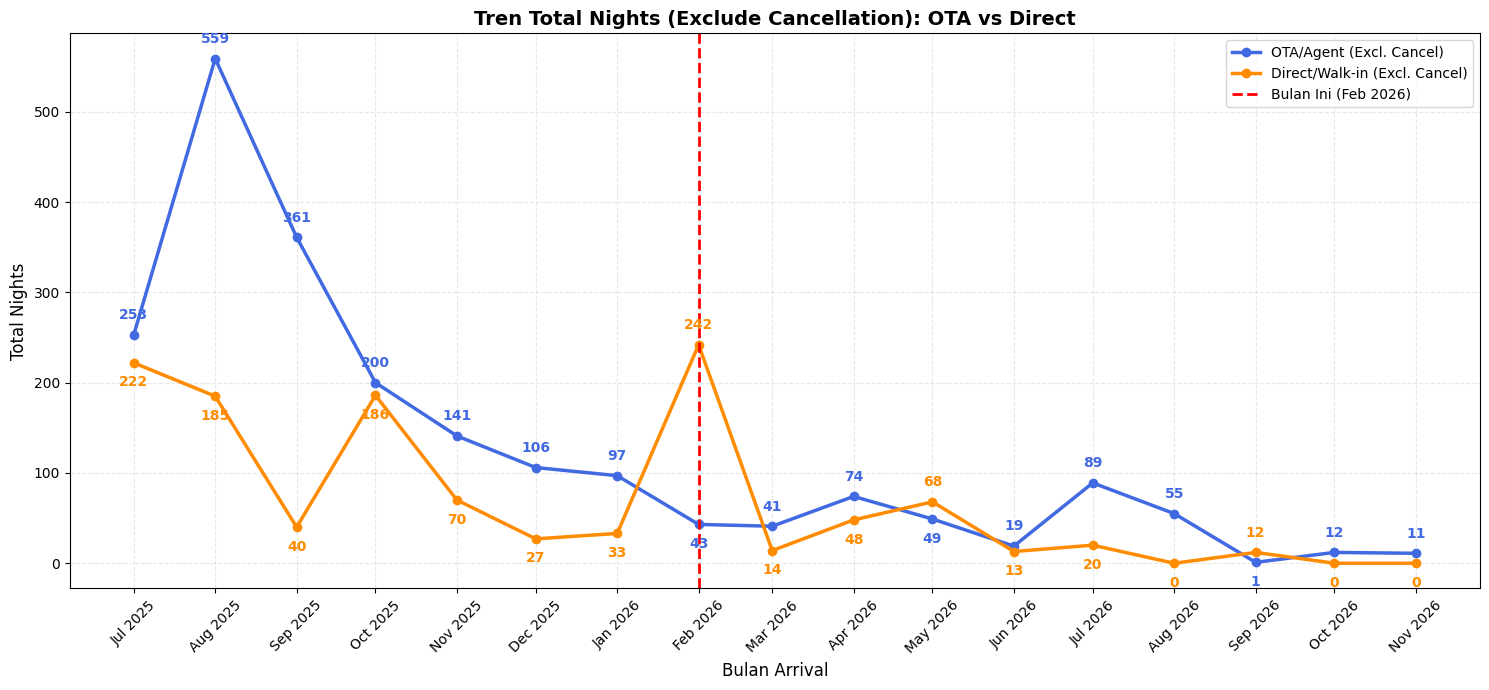

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# 1. Pastikan kolom Arrival menjadi tipe datetime
df['Arrival'] = pd.to_datetime(df['Arrival'])

# 2. Definisikan kategori filter
direct_categories = ['DIRECT', 'WALK IN']
status_exclude = ['CANCELLATION'] # Tambahkan status yang ingin dibuang

# 3. Filter DataFrame Utama: Hapus data CANCELLATION terlebih dahulu
df_active = df[~df['Status'].isin(status_exclude)].copy()

# 4. Pisahkan dataframe berdasarkan kategori Agent dari data yang sudah difilter statusnya
df_direct = df_active[df_active['Agent'].isin(direct_categories)].copy()
df_exclude_direct = df_active[~df_active['Agent'].isin(direct_categories)].copy()

# 5. Agregasi: Total Nights per bulan
all_months = sorted(df_active['Arrival'].dt.to_period('M').unique())

trend_exclude = df_exclude_direct.groupby(
    df_exclude_direct['Arrival'].dt.to_period('M'))['Nights'].sum().reindex(all_months, fill_value=0)

trend_only_direct = df_direct.groupby(
    df_direct['Arrival'].dt.to_period('M'))['Nights'].sum().reindex(all_months, fill_value=0)

# Konversi ke timestamp untuk plotting
trend_exclude.index = trend_exclude.index.to_timestamp()
trend_only_direct.index = trend_only_direct.index.to_timestamp()

# 6. Tentukan Bulan Ini untuk Garis Penanda
today = pd.Timestamp(datetime.now()).replace(day=1, hour=0, minute=0, second=0, microsecond=0)

# 7. Membuat Plot
plt.figure(figsize=(15, 7))

# Plot Garis Biru (OTA/Agent - Exclude Cancellation)
plt.plot(trend_exclude.index, trend_exclude.values, marker='o', 
         linestyle='-', color='royalblue', label='OTA/Agent (Excl. Cancel)', linewidth=2.5)

# Plot Garis Oranye (Direct/Walk-in - Exclude Cancellation)
plt.plot(trend_only_direct.index, trend_only_direct.values, marker='o', 
         linestyle='-', color='darkorange', label='Direct/Walk-in (Excl. Cancel)', linewidth=2.5)

# Garis Penanda Bulan Ini
plt.axvline(x=today, color='red', linestyle='--', linewidth=2, label=f'Bulan Ini ({today.strftime("%b %Y")})')

# 8. LOGIKA ANTI-TUMPANG TINDIH UNTUK LABEL ANGKA
max_val = max(trend_exclude.max(), trend_only_direct.max()) if not trend_exclude.empty else 100
offset = max_val * 0.025

for i in range(len(trend_exclude)):
    val_exclude = trend_exclude.values[i]
    val_direct = trend_only_direct.values[i]
    x_pos = trend_exclude.index[i]
    
    if val_exclude >= val_direct:
        plt.text(x_pos, val_exclude + offset, f'{int(val_exclude)}', color='royalblue', ha='center', va='bottom', fontweight='bold')
        plt.text(x_pos, val_direct - offset, f'{int(val_direct)}', color='darkorange', ha='center', va='top', fontweight='bold')
    else:
        plt.text(x_pos, val_direct + offset, f'{int(val_direct)}', color='darkorange', ha='center', va='bottom', fontweight='bold')
        plt.text(x_pos, val_exclude - offset, f'{int(val_exclude)}', color='royalblue', ha='center', va='top', fontweight='bold')

# Elemen Estetik
plt.title('Tren Total Nights (Exclude Cancellation): OTA vs Direct', fontsize=14, fontweight='bold')
plt.xlabel('Bulan Arrival', fontsize=12)
plt.ylabel('Total Nights', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3)
plt.legend(loc='upper right')

# Format tanggal di sumbu X
plt.xticks(trend_exclude.index, trend_exclude.index.strftime('%b %Y'), rotation=45)

plt.tight_layout()
plt.show()

Tren Room Type

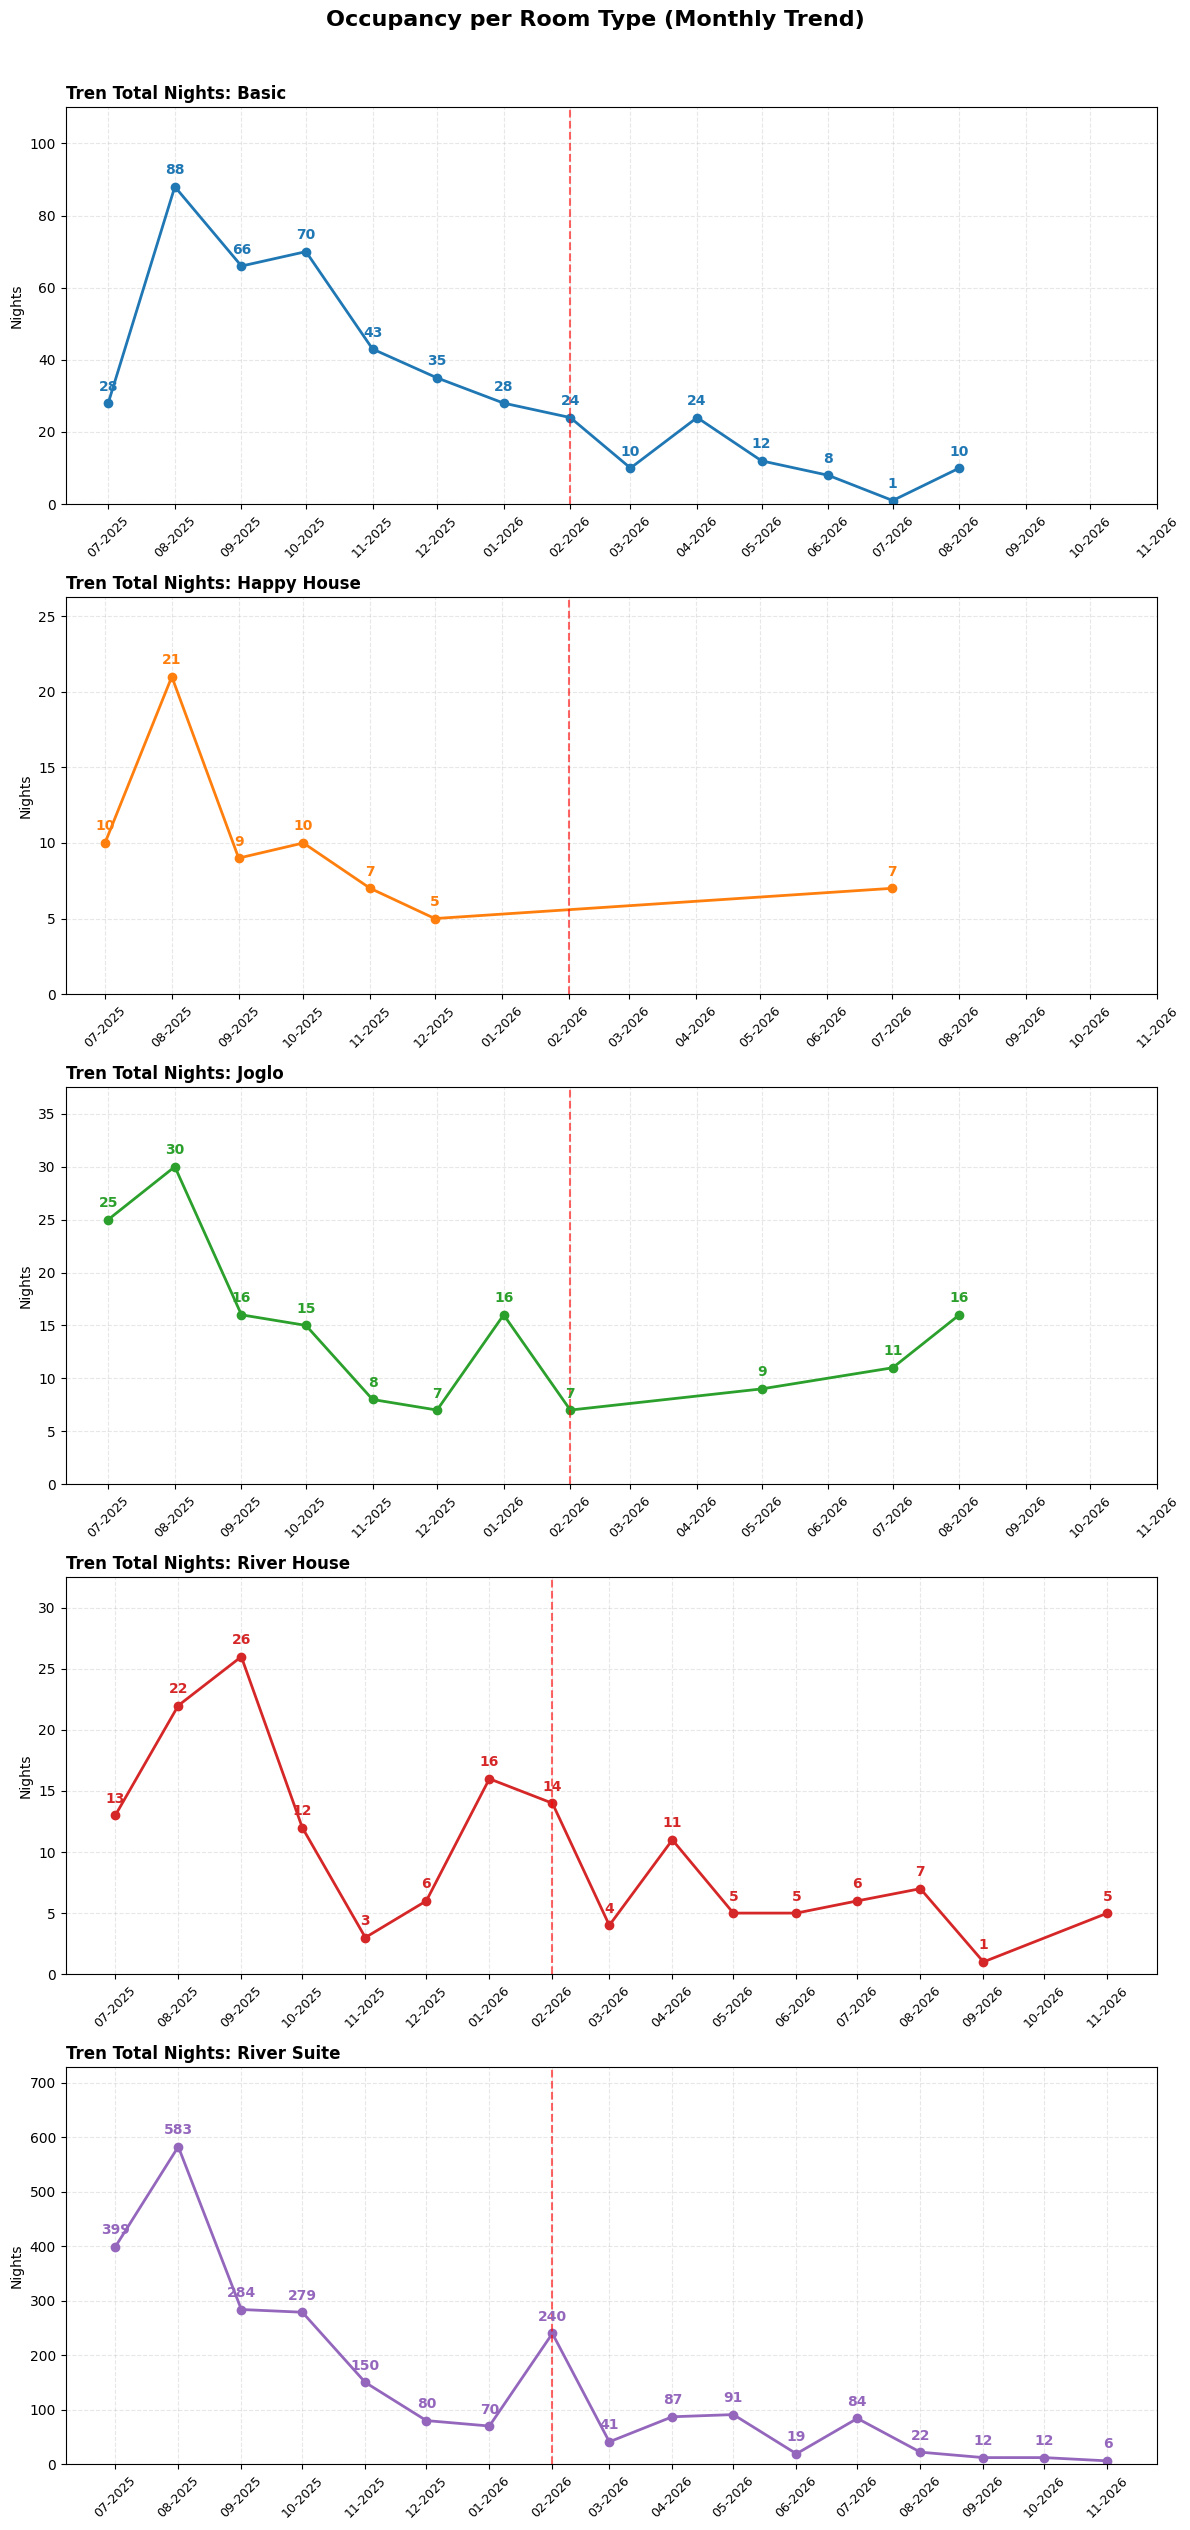

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from matplotlib.ticker import StrMethodFormatter

# 1. Persiapan Data
df['Arrival'] = pd.to_datetime(df['Arrival'])
df['Nights'] = pd.to_numeric(df['Nights'], errors='coerce')

# 2. Agregasi Total Nights per Bulan & Room Type
all_months = sorted(df['Arrival'].dt.to_period('M').unique())
monthly_nights = df.groupby([df['Arrival'].dt.to_period('M'), 'Room Type'])['Nights'].sum().reset_index()
monthly_nights['Arrival'] = monthly_nights['Arrival'].dt.to_timestamp()

# 3. Pengaturan Subplots
room_types = sorted(monthly_nights['Room Type'].unique())
n_rooms = len(room_types)

fig, axes = plt.subplots(nrows=n_rooms, ncols=1, figsize=(12, 5 * n_rooms), sharex=False)

if n_rooms == 1:
    axes = [axes]

today = pd.Timestamp(datetime.now()).replace(day=1, hour=0, minute=0, second=0, microsecond=0)
all_ticks = sorted(monthly_nights['Arrival'].unique())
date_labels = [d.strftime('%m-%Y') for d in all_ticks]

# 4. Loop Plotting
for i, room_type in enumerate(room_types):
    subset = monthly_nights[(monthly_nights['Room Type'] == room_type) & (monthly_nights['Nights'] > 0)]
    
    ax = axes[i]
    if not subset.empty:
        line = ax.plot(subset['Arrival'], subset['Nights'], marker='o', color=f'C{i}', linewidth=2, label=room_type)
        
        # --- PERBAIKAN: Tambahkan Padding pada Sumbu Y agar angka tidak offside ---
        y_max = subset['Nights'].max()
        # Memberikan ruang 20% lebih tinggi dari nilai tertinggi
        ax.set_ylim(0, y_max * 1.25) 
        
        # Tambahkan Label Angka
        for x, y in zip(subset['Arrival'], subset['Nights']):
            ax.text(x, y + (y_max * 0.03), f'{int(y)}', color=f'C{i}', 
                    fontweight='bold', ha='center', va='bottom', fontsize=10)
    
    # Elemen Visual Subplot
    ax.set_title(f'Tren Total Nights: {room_type}', fontsize=12, fontweight='bold', loc='left')
    ax.set_ylabel('Nights')
    ax.grid(True, linestyle='--', alpha=0.3)
    
    # Garis Penanda Bulan Ini
    ax.axvline(x=today, color='red', linestyle='--', alpha=0.6)
    
    # Format Tanggal MM-YYYY di tiap subplot
    ax.set_xticks(all_ticks)
    ax.set_xticklabels(date_labels, rotation=45, fontsize=9)
    
    # Formatter angka Y
    ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

# 5. Finalisasi
plt.suptitle('Occupancy per Room Type (Monthly Trend)', fontsize=16, fontweight='bold', y=1.01)
plt.tight_layout()
plt.show()

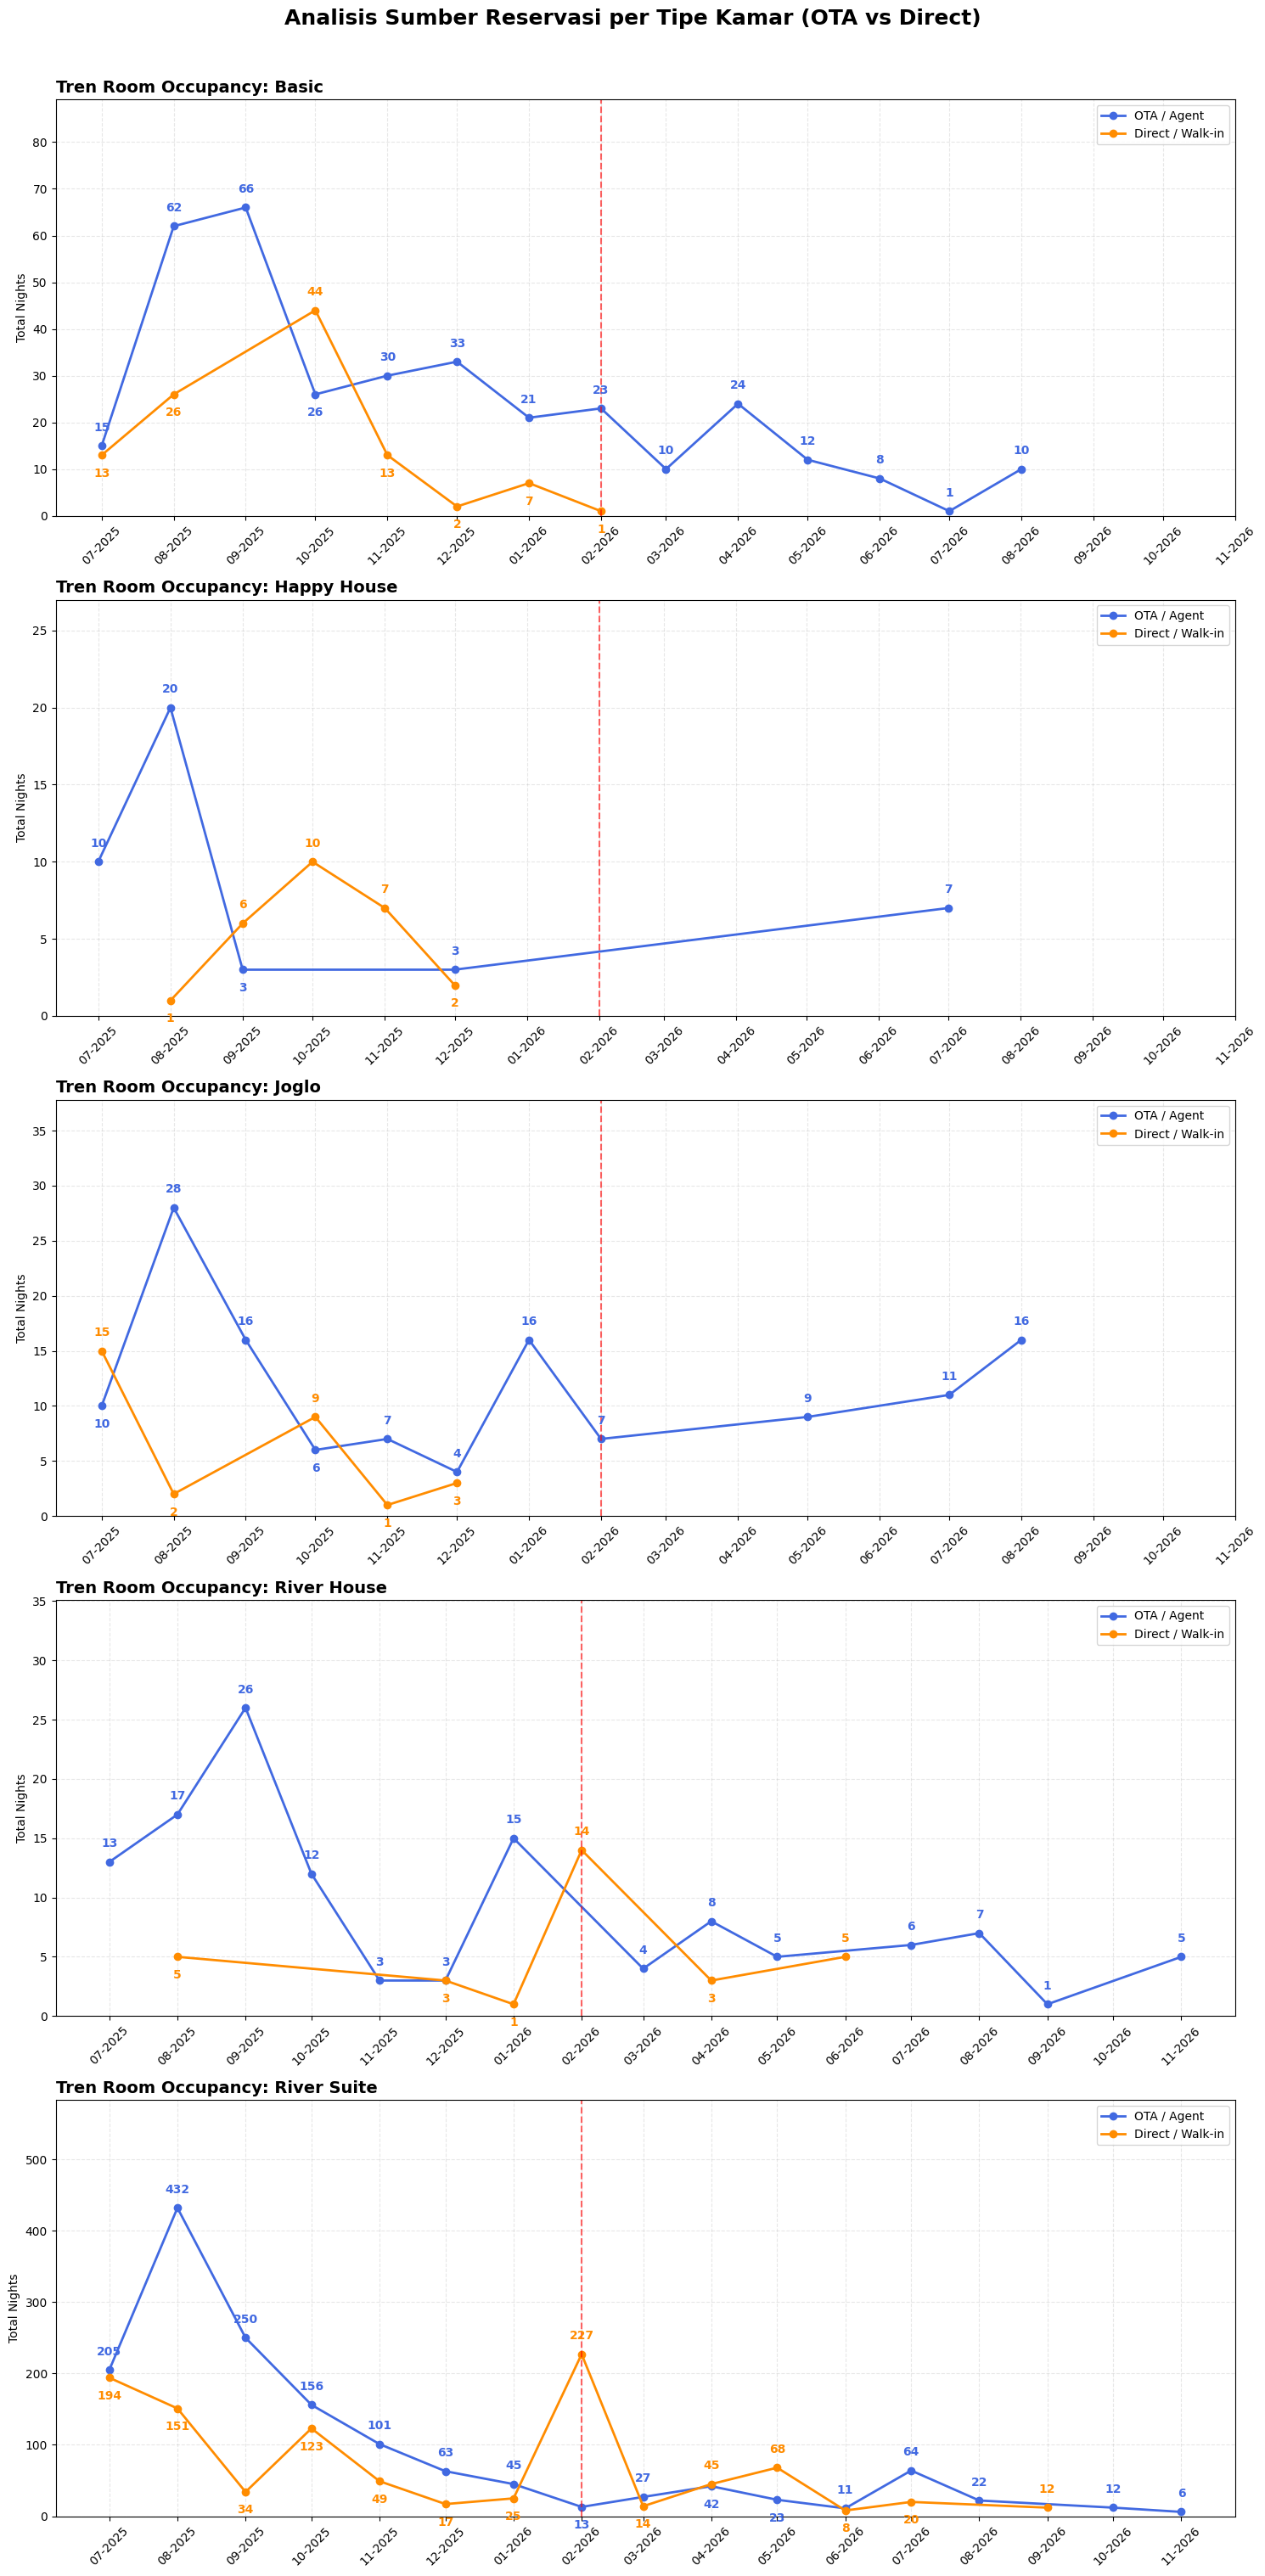

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from matplotlib.ticker import StrMethodFormatter

# 1. Persiapan Data
df['Arrival'] = pd.to_datetime(df['Arrival'])
df['Nights'] = pd.to_numeric(df['Nights'], errors='coerce')

# 2. Definisikan Kategori Agent
direct_categories = ['DIRECT', 'WALK IN']

# 3. Agregasi Data per Bulan, Room Type, dan Kategori Agent
all_months = sorted(df['Arrival'].dt.to_period('M').unique())
all_ticks = [m.to_timestamp() for m in all_months]
date_labels = [m.strftime('%m-%Y') for m in all_months]

room_types = sorted(df['Room Type'].unique())
n_rooms = len(room_types)

# 4. Pengaturan Subplots
fig, axes = plt.subplots(nrows=n_rooms, ncols=1, figsize=(15, 6 * n_rooms), sharex=False)

if n_rooms == 1:
    axes = [axes]

today = pd.Timestamp(datetime.now()).replace(day=1, hour=0, minute=0, second=0, microsecond=0)

# 5. Loop Plotting per Room Type
for i, room_type in enumerate(room_types):
    ax = axes[i]
    df_room = df[df['Room Type'] == room_type]
    
    # Pisahkan Data: Exclude vs Only Direct
    df_exc = df_room[~df_room['Agent'].isin(direct_categories)]
    df_only = df_room[df_room['Agent'].isin(direct_categories)]
    
    # Agregasi per bulan
    trend_exc = df_exc.groupby(df_exc['Arrival'].dt.to_period('M'))['Nights'].sum().reindex(all_months, fill_value=0)
    trend_only = df_only.groupby(df_only['Arrival'].dt.to_period('M'))['Nights'].sum().reindex(all_months, fill_value=0)
    
    # Plotting Garis Biru (Agent/OTA)
    # Filter > 0 untuk menghindari drop tajam ke nol
    mask_exc = trend_exc > 0
    if mask_exc.any():
        ax.plot(trend_exc.index.to_timestamp()[mask_exc], trend_exc[mask_exc], 
                marker='o', color='royalblue', label='OTA / Agent', linewidth=2)

    # Plotting Garis Oranye (Direct/Walk-in)
    mask_only = trend_only > 0
    if mask_only.any():
        ax.plot(trend_only.index.to_timestamp()[mask_only], trend_only[mask_only], 
                marker='o', color='darkorange', label='Direct / Walk-in', linewidth=2)

    # --- LOGIKA ANTI-OFFSIDE & ANTI-TABRAKAN ANGKA ---
    y_max = max(trend_exc.max(), trend_only.max())
    ax.set_ylim(0, y_max * 1.35) # Padding 35% agar label tidak offside
    
    offset = y_max * 0.04
    for m in all_months:
        v_exc = trend_exc[m]
        v_only = trend_only[m]
        x_pos = m.to_timestamp()
        
        if v_exc == 0 and v_only == 0: continue
        
        if v_exc >= v_only:
            if v_exc > 0: ax.text(x_pos, v_exc + offset, f'{int(v_exc)}', color='royalblue', ha='center', va='bottom', fontweight='bold')
            if v_only > 0: ax.text(x_pos, v_only - offset, f'{int(v_only)}', color='darkorange', ha='center', va='top', fontweight='bold')
        else:
            if v_only > 0: ax.text(x_pos, v_only + offset, f'{int(v_only)}', color='darkorange', ha='center', va='bottom', fontweight='bold')
            if v_exc > 0: ax.text(x_pos, v_exc - offset, f'{int(v_exc)}', color='royalblue', ha='center', va='top', fontweight='bold')

    # Elemen Visual Subplot
    ax.set_title(f'Tren Room Occupancy: {room_type}', fontsize=14, fontweight='bold', loc='left')
    ax.set_ylabel('Total Nights')
    ax.grid(True, linestyle='--', alpha=0.3)
    ax.legend(loc='upper right', frameon=True)
    ax.axvline(x=today, color='red', linestyle='--', alpha=0.6)
    
    # Format Sumbu X & Y
    ax.set_xticks(all_ticks)
    ax.set_xticklabels(date_labels, rotation=45, fontsize=10)
    ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

# 6. Finalisasi
plt.suptitle('Analisis Sumber Reservasi per Tipe Kamar (OTA vs Direct)', fontsize=18, fontweight='bold', y=1.01)
plt.tight_layout()
plt.show()

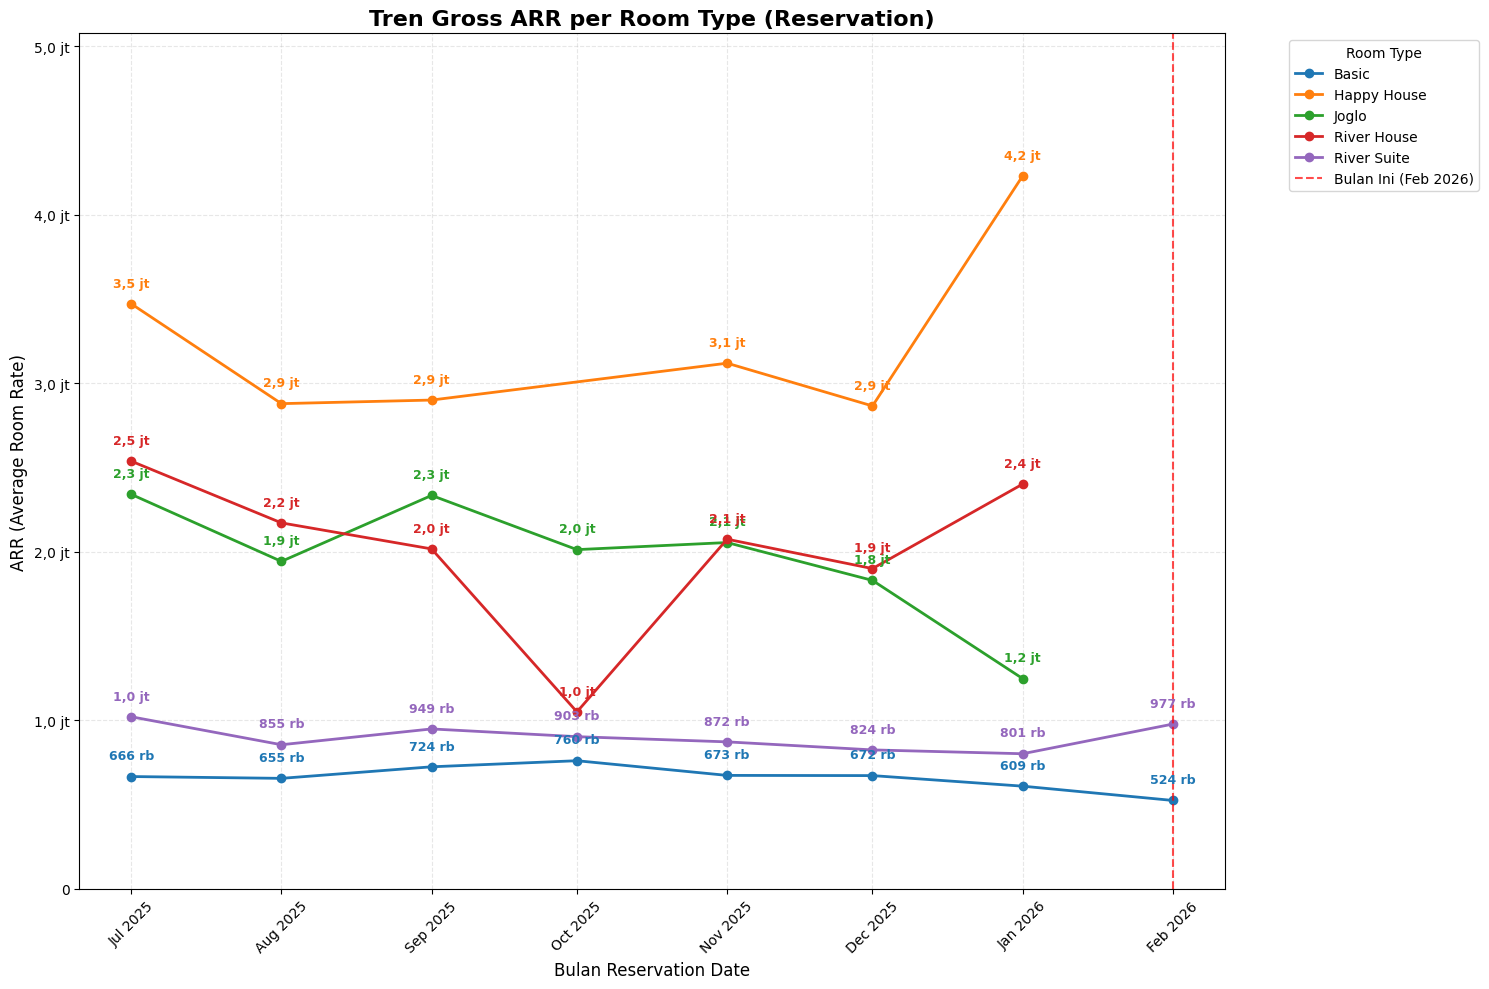

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Fungsi untuk memformat angka ke format ringkas (jt/rb)
def format_compact(n):
    if n >= 1_000_000:
        val = n / 1_000_000
        return f'{val:,.1f} jt'.replace('.', ',')
    elif n >= 1_000:
        val = n / 1_000
        return f'{val:,.0f} rb'.replace('.', ',')
    return f'{int(n)}'

# 1. Pastikan kolom tanggal dan numerik dalam format yang benar
df['Reservation Date'] = pd.to_datetime(df['Reservation Date'])
df['Room Charge'] = pd.to_numeric(df['Room Charge'], errors='coerce')
df['Nights'] = pd.to_numeric(df['Nights'], errors='coerce')

# 2. Agregasi: Grouping berdasarkan Bulan (Reservation Date) dan Room Type
monthly_data = df.groupby([df['Reservation Date'].dt.to_period('M'), 'Room Type']).agg({
    'Room Charge': 'sum',
    'Nights': 'sum'
}).reset_index()

# 3. Hitung ARR
monthly_data['ARR'] = monthly_data['Room Charge'] / monthly_data['Nights']
monthly_data['Reservation Date'] = monthly_data['Reservation Date'].dt.to_timestamp()

# 4. Membuat Visualisasi
plt.figure(figsize=(15, 10))
ax = plt.gca()

# Loop untuk setiap Unique Room Type
all_arr_values = monthly_data['ARR'].dropna()
max_arr = all_arr_values.max() if not all_arr_values.empty else 0

for room_type in monthly_data['Room Type'].unique():
    # Filter data agar tidak memplot nilai 0 atau NaN (menghindari garis drop tajam)
    subset = monthly_data[(monthly_data['Room Type'] == room_type) & (monthly_data['ARR'] > 0)].copy()
    
    if not subset.empty:
        line = ax.plot(subset['Reservation Date'], subset['ARR'], marker='o', label=room_type, linewidth=2)
        color = line[0].get_color() # Ambil warna garis agar label teks senada

        # Tambahkan Label Detail Harga per Titik
        for x, y in zip(subset['Reservation Date'], subset['ARR']):
            ax.text(x, y + (max_arr * 0.02), format_compact(y), 
                    color=color, fontsize=9, fontweight='bold', ha='center', va='bottom')

# Tambahkan Padding pada Sumbu Y agar label paling atas tidak terpotong
ax.set_ylim(0, max_arr * 1.2)

# Tambahkan Garis Penanda Bulan Ini
today = pd.Timestamp(datetime.now()).replace(day=1, hour=0, minute=0, second=0, microsecond=0)
plt.axvline(x=today, color='red', linestyle='--', alpha=0.7, label=f'Bulan Ini ({today.strftime("%b %Y")})')

# Elemen Estetik
plt.title('Tren Gross ARR per Room Type (Reservation)', fontsize=16, fontweight='bold')
plt.xlabel('Bulan Reservation Date', fontsize=12)
plt.ylabel('ARR (Average Room Rate)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3)
plt.legend(title='Room Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Format angka pada sumbu Y agar tetap rapi
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format_compact(x)))

plt.xticks(monthly_data['Reservation Date'].unique(), 
           [d.strftime('%b %Y') for d in monthly_data['Reservation Date'].unique()], 
           rotation=45)

plt.tight_layout()
plt.show()

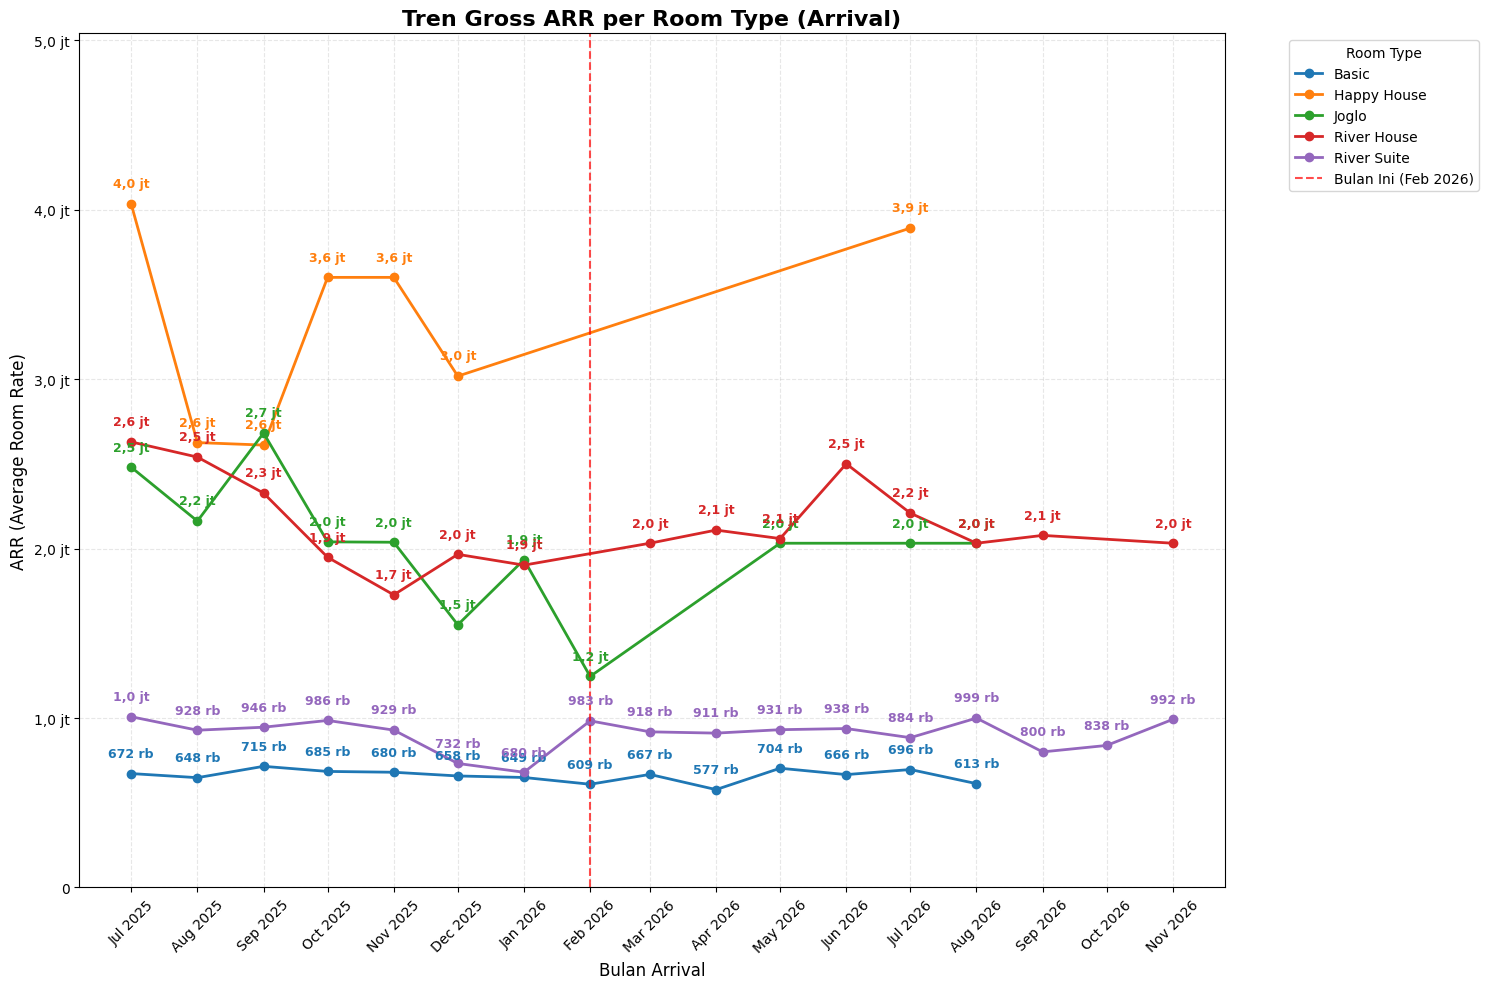

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from matplotlib.ticker import FuncFormatter

# Fungsi untuk memformat angka ke format ringkas (jt/rb)
def format_compact(n, pos=None):
    if n >= 1_000_000:
        val = n / 1_000_000
        return f'{val:,.1f} jt'.replace('.', ',')
    elif n >= 1_000:
        val = n / 1_000
        return f'{val:,.0f} rb'.replace('.', ',')
    return f'{int(n)}'

# 1. Pastikan kolom tanggal dan numerik dalam format yang benar
df['Arrival'] = pd.to_datetime(df['Arrival'])
df['Room Charge'] = pd.to_numeric(df['Room Charge'], errors='coerce')
df['Nights'] = pd.to_numeric(df['Nights'], errors='coerce')

# 2. Agregasi: Grouping berdasarkan Bulan (Arrival) dan Room Type
monthly_data = df.groupby([df['Arrival'].dt.to_period('M'), 'Room Type']).agg({
    'Room Charge': 'sum',
    'Nights': 'sum'
}).reset_index()

# 3. Hitung ARR
monthly_data['ARR'] = monthly_data['Room Charge'] / monthly_data['Nights']
monthly_data['Arrival'] = monthly_data['Arrival'].dt.to_timestamp()

# 4. Membuat Visualisasi
plt.figure(figsize=(15, 10))
ax = plt.gca()

# Ambil nilai maksimal ARR untuk perhitungan offset dan padding
max_arr = monthly_data['ARR'].max() if not monthly_data['ARR'].dropna().empty else 1

# Loop untuk setiap Unique Room Type
for room_type in monthly_data['Room Type'].unique():
    # FILTER: Ambil subset yang HANYA memiliki ARR > 0
    subset = monthly_data[(monthly_data['Room Type'] == room_type) & (monthly_data['ARR'] > 0)].copy()
    
    # Plot hanya jika ada data yang tersisa setelah filter
    if not subset.empty:
        line = ax.plot(subset['Arrival'], subset['ARR'], marker='o', label=room_type, linewidth=2)
        color = line[0].get_color() # Ambil warna garis untuk teks label

        # Tambahkan Label Detail Harga per Titik (format ringkas)
        for x, y in zip(subset['Arrival'], subset['ARR']):
            ax.text(x, y + (max_arr * 0.02), format_compact(y), 
                    color=color, fontsize=9, fontweight='bold', ha='center', va='bottom')

# Tambahkan Padding pada Sumbu Y agar label paling atas tidak terpotong
ax.set_ylim(0, max_arr * 1.25)

# Tambahkan Garis Penanda Bulan Ini
today = pd.Timestamp(datetime.now()).replace(day=1, hour=0, minute=0, second=0, microsecond=0)
plt.axvline(x=today, color='red', linestyle='--', alpha=0.7, label=f'Bulan Ini ({today.strftime("%b %Y")})')

# Elemen Estetik
plt.title('Tren Gross ARR per Room Type (Arrival)', fontsize=16, fontweight='bold')
plt.xlabel('Bulan Arrival', fontsize=12)
plt.ylabel('ARR (Average Room Rate)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3)
plt.legend(title='Room Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Terapkan format ringkas pada sumbu Y juga agar seragam
ax.yaxis.set_major_formatter(FuncFormatter(format_compact))

# Pastikan semua bulan muncul di sumbu X meski datanya difilter
all_ticks = sorted(monthly_data['Arrival'].unique())
plt.xticks(all_ticks, [d.strftime('%b %Y') for d in all_ticks], rotation=45)

plt.tight_layout()
plt.show()

In [18]:
start_date = '2026-03-01'
end_date = '2026-03-31'

df_maret_2026 = df[df['Arrival'].between(start_date, end_date)].copy()
df_maret_2026

,Reservation Date,Folio,Reference No,Room Type,Room,Rates,Guest,Date of Birth,Guest Email,Nationality,...,Status,Cancel Date,Special Request,Room Charge,Extra Charge,Pos,Rebate,Commission,Total,Room Net
152,2025-07-22,181,NaN,River Suite,River Suite A5,Room Breakfast 2 Pax,Mrs margaret lambert,NaN,NaN,Australia,...,DEFINITE,NaT,NaN,5494500,0,0.0,0,989010.0,5494500.0,3.453009e+06
566,2025-09-24,568,6837206334,River Suite,River Suite D7,Room Breakfast 2 Pax,Rob and Paula MacDonald,NaN,rmacdo.399395@guest.booking.com,NaN,...,CANCELLED,2025-09-30,NaN,5161500,0,0.0,0,929070.0,5161500.0,3.416928e+06
567,2025-09-24,569,6837206334,River Suite,River Suite D8,Room Breakfast 2 Pax,Rob and Paula MacDonald,NaN,rmacdo.399395@guest.booking.com,NaN,...,CANCELLED,2025-09-30,NaN,5161500,0,0.0,0,929070.0,5161500.0,3.416928e+06
581,2025-09-27,576,NaN,River Suite,River Suite B5,Room Breakfast 2 Pax,Mr Jemaya,NaN,NaN,NaN,...,CANCELLED,2026-01-19,NaN,1600000,0,0.0,0,0.0,1600000.0,1.201201e+06
582,2025-09-27,577,NaN,River Suite,River Suite C7,Room Breakfast 2 Pax,Mr Jemaya,NaN,NaN,NaN,...,CANCELLED,2026-01-19,NaN,1600000,0,0.0,0,0.0,1600000.0,1.201201e+06
583,2025-09-27,579,NaN,River Suite,River Suite A6,Room Breakfast 2 Pax,Mr Jemaya,NaN,NaN,NaN,...,CANCELLED,2026-01-19,NaN,1600000,0,0.0,0,0.0,1600000.0,1.201201e+06
584,2025-09-27,574,NaN,River Suite,River Suite C5,Room Breakfast 2 Pax,Mr Jemaya,NaN,NaN,NaN,...,CANCELLED,2026-01-19,NaN,1600000,0,0.0,0,0.0,1600000.0,1.201201e+06
585,2025-09-27,580,NaN,River Suite,River Suite A7,Room Breakfast 2 Pax,Mr Jemaya,NaN,NaN,NaN,...,CANCELLED,2026-01-19,NaN,1600000,0,0.0,0,0.0,1600000.0,1.201201e+06
586,2025-09-27,578,NaN,River Suite,River Suite A5,Room Breakfast 2 Pax,Mr Jemaya,NaN,NaN,NaN,...,CANCELLED,2026-01-19,NaN,1600000,0,0.0,0,0.0,1600000.0,1.201201e+06
587,2025-09-27,575,NaN,River Suite,River Suite C6,Room Breakfast 2 Pax,Mr Jemaya,NaN,NaN,NaN,...,CANCELLED,2026-01-19,NaN,1600000,0,0.0,0,0.0,1600000.0,1.201201e+06


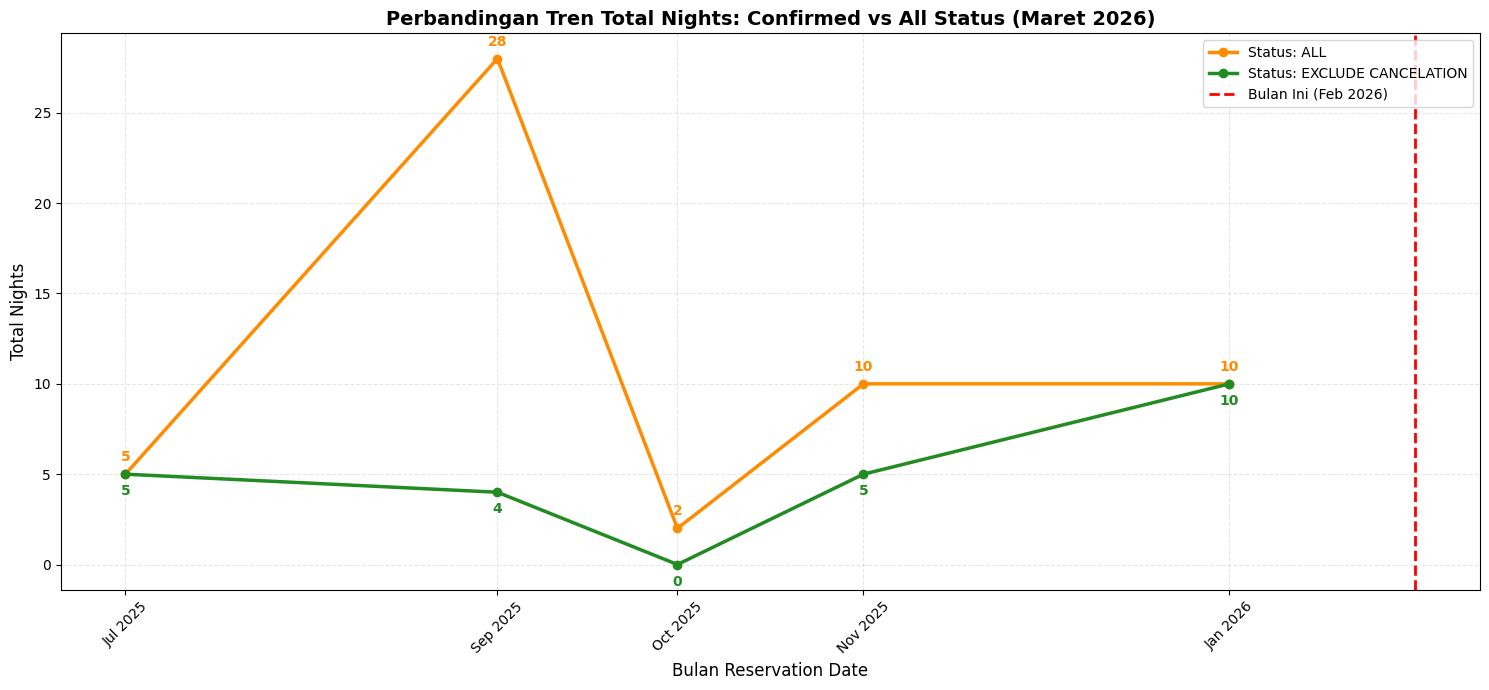

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# 1. Pastikan kolom Reservation Date pada df_maret_2026 menjadi tipe datetime
df_maret_2026['Reservation Date'] = pd.to_datetime(df_maret_2026['Reservation Date'])

# 2. Definisikan kondisi status
confirmed_status = ['DEFINITE', 'CHECK_OUT']

# 3. Pisahkan dataframe dan Agregasi Total Nights per bulan
# (Catatan: Karena datanya sudah difilter Maret 2026, hasil agregasi hanya akan ada 1 periode)
all_months = sorted(df_maret_2026['Reservation Date'].dt.to_period('M').unique())

trend_confirmed = df_maret_2026[df_maret_2026['Status'].isin(confirmed_status)].groupby(
    df_maret_2026['Reservation Date'].dt.to_period('M'))['Nights'].sum().reindex(all_months, fill_value=0)

trend_all = df_maret_2026.groupby(
    df_maret_2026['Reservation Date'].dt.to_period('M'))['Nights'].sum().reindex(all_months, fill_value=0)

# Kembalikan ke format timestamp untuk plotting
trend_confirmed.index = trend_confirmed.index.to_timestamp()
trend_all.index = trend_all.index.to_timestamp()

# --- TAMBAHAN: Tentukan Bulan Ini ---
today = pd.Timestamp(datetime.now()).replace(day=1, hour=0, minute=0, second=0, microsecond=0)

# 4. Membuat Plot
plt.figure(figsize=(15, 7))

# Plot Garis Oranye (Status: ALL)
plt.plot(trend_all.index, trend_all.values, marker='o', 
         linestyle='-', color='darkorange', label='Status: ALL', linewidth=2.5)

# Plot Garis Hijau (Status: EXCLUDE CANCELATION)
plt.plot(trend_confirmed.index, trend_confirmed.values, marker='o', 
         linestyle='-', color='forestgreen', label='Status: EXCLUDE CANCELATION', linewidth=2.5)

# --- TAMBAHAN: Garis Penanda Bulan Ini ---
# Catatan: Garis ini hanya akan terlihat jika 'today' berada di dalam rentang waktu data
plt.axvline(x=today, color='red', linestyle='--', linewidth=2, label=f'Bulan Ini ({today.strftime("%b %Y")})')

# 5. LOGIKA ANTI-TUMPANG TINDIH UNTUK LABEL ANGKA
max_val = max(trend_all.max(), trend_confirmed.max()) if not trend_all.empty else 1
offset = max_val * 0.02  # Jarak dinamis antar teks dan titik

for i in range(len(all_months)):
    val_all = trend_all.values[i]
    val_conf = trend_confirmed.values[i]
    x_pos = trend_all.index[i]
    
    # Jika Nilai ALL (Oren) lebih tinggi atau sama dengan Confirmed (Hijau)
    if val_all >= val_conf:
        # Oren di atas
        plt.text(x_pos, val_all + offset, f'{int(val_all)}', 
                 color='darkorange', ha='center', va='bottom', fontweight='bold')
        # Hijau di bawah
        plt.text(x_pos, val_conf - offset, f'{int(val_conf)}', 
                 color='forestgreen', ha='center', va='top', fontweight='bold')
    else:
        # Hijau di atas
        plt.text(x_pos, val_conf + offset, f'{int(val_conf)}', 
                 color='forestgreen', ha='center', va='bottom', fontweight='bold')
        # Oren di bawah
        plt.text(x_pos, val_all - offset, f'{int(val_all)}', 
                 color='darkorange', ha='center', va='top', fontweight='bold')

# Elemen Estetik
plt.title('Perbandingan Tren Total Nights: Confirmed vs All Status (Maret 2026)', fontsize=14, fontweight='bold')
plt.xlabel('Bulan Reservation Date', fontsize=12)
plt.ylabel('Total Nights', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3)
plt.legend(loc='upper right')

# Format tanggal di sumbu X
plt.xticks(trend_all.index, trend_all.index.strftime('%b %Y'), rotation=45)

plt.tight_layout()
plt.show()

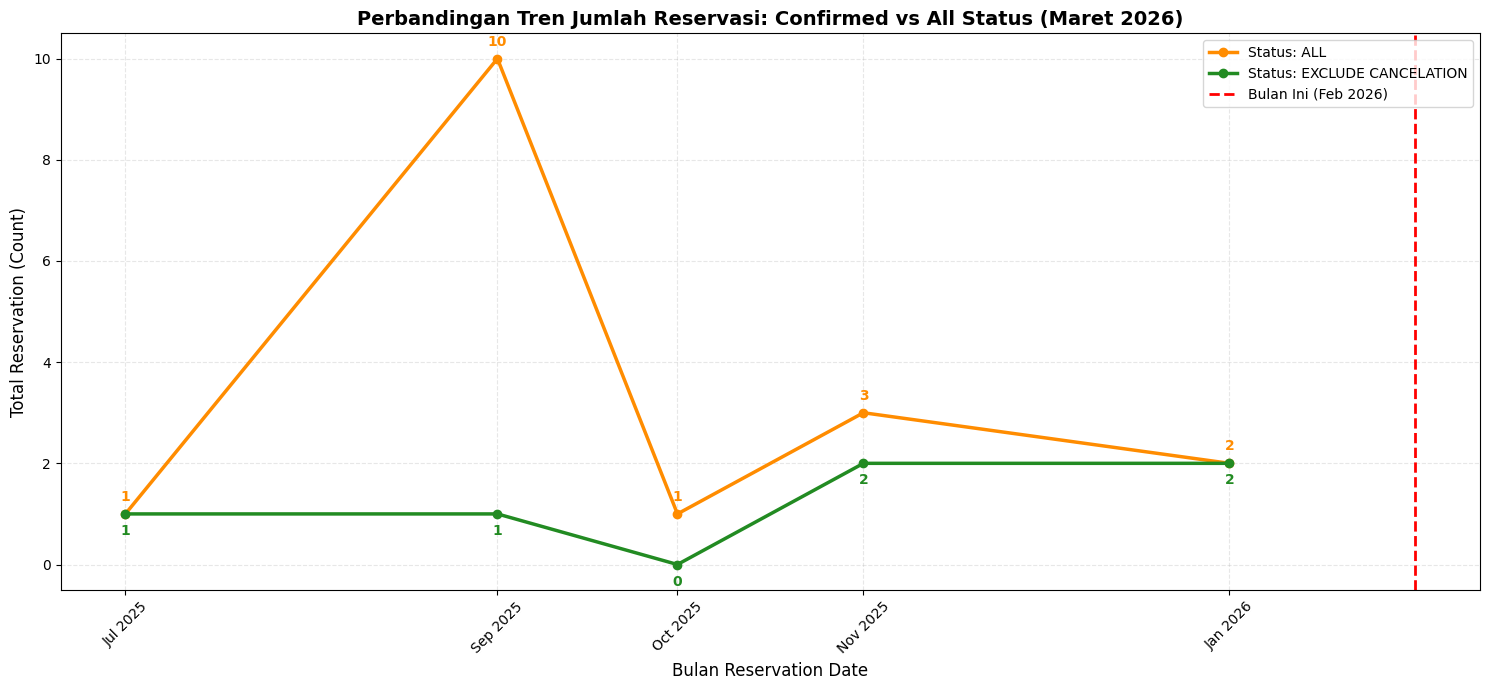

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# 1. Pastikan kolom Reservation Date pada df_maret_2026 menjadi tipe datetime
df_maret_2026['Reservation Date'] = pd.to_datetime(df_maret_2026['Reservation Date'])

# 2. Definisikan kondisi status
confirmed_status = ['DEFINITE', 'CHECK_OUT']

# 3. Pisahkan dataframe dan Agregasi Jumlah Reservasi (count) per periode
all_months = sorted(df_maret_2026['Reservation Date'].dt.to_period('M').unique())

# Menggunakan .size() untuk menghitung jumlah baris (banyaknya reservasi)
trend_confirmed = df_maret_2026[df_maret_2026['Status'].isin(confirmed_status)].groupby(
    df_maret_2026['Reservation Date'].dt.to_period('M')).size().reindex(all_months, fill_value=0)

trend_all = df_maret_2026.groupby(
    df_maret_2026['Reservation Date'].dt.to_period('M')).size().reindex(all_months, fill_value=0)

# Kembalikan ke format timestamp untuk plotting
trend_confirmed.index = trend_confirmed.index.to_timestamp()
trend_all.index = trend_all.index.to_timestamp()

# --- TAMBAHAN: Tentukan Bulan Ini ---
today = pd.Timestamp(datetime.now()).replace(day=1, hour=0, minute=0, second=0, microsecond=0)

# 4. Membuat Plot
plt.figure(figsize=(15, 7))

# Plot Garis Oranye (Status: ALL)
plt.plot(trend_all.index, trend_all.values, marker='o', 
         linestyle='-', color='darkorange', label='Status: ALL', linewidth=2.5)

# Plot Garis Hijau (Status: EXCLUDE CANCELATION)
plt.plot(trend_confirmed.index, trend_confirmed.values, marker='o', 
         linestyle='-', color='forestgreen', label='Status: EXCLUDE CANCELATION', linewidth=2.5)

# --- TAMBAHAN: Garis Penanda Bulan Ini ---
plt.axvline(x=today, color='red', linestyle='--', linewidth=2, label=f'Bulan Ini ({today.strftime("%b %Y")})')

# 5. LOGIKA ANTI-TUMPANG TINDIH UNTUK LABEL ANGKA
max_val = max(trend_all.max(), trend_confirmed.max()) if not trend_all.empty else 1
offset = max_val * 0.02  # Jarak dinamis antar teks dan titik

for i in range(len(all_months)):
    val_all = trend_all.values[i]
    val_conf = trend_confirmed.values[i]
    x_pos = trend_all.index[i]
    
    if val_all >= val_conf:
        # Oren di atas
        plt.text(x_pos, val_all + offset, f'{int(val_all)}', 
                 color='darkorange', ha='center', va='bottom', fontweight='bold')
        # Hijau di bawah
        plt.text(x_pos, val_conf - offset, f'{int(val_conf)}', 
                 color='forestgreen', ha='center', va='top', fontweight='bold')
    else:
        # Hijau di atas
        plt.text(x_pos, val_conf + offset, f'{int(val_conf)}', 
                 color='forestgreen', ha='center', va='bottom', fontweight='bold')
        # Oren di bawah
        plt.text(x_pos, val_all - offset, f'{int(val_all)}', 
                 color='darkorange', ha='center', va='top', fontweight='bold')

# Elemen Estetik
plt.title('Perbandingan Tren Jumlah Reservasi: Confirmed vs All Status (Maret 2026)', fontsize=14, fontweight='bold')
plt.xlabel('Bulan Reservation Date', fontsize=12)
plt.ylabel('Total Reservation (Count)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3)
plt.legend(loc='upper right')

# Format tanggal di sumbu X
plt.xticks(trend_all.index, trend_all.index.strftime('%b %Y'), rotation=45)

plt.tight_layout()
plt.show()